In [10]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from model import InvertedPendulum, massSpringDamper

In [11]:
class PID_controller():
    def __init__(self, kp, ki, kd):
        self.kp = kp
        self.ki = ki
        self.kd = kd

    def action(self, error, errorDot, errorInt):
        return self.kp*error + self.ki*errorInt + self.kd*errorDot
    
class stateFeedback_controller():
    def __init__(self, gain):
        self.gain = gain
    
    def action(self, state):
        return np.dot(self.gain, state)
    

In [64]:
def main():
    m_msd = 1
    c_msd = 1
    k_msd = 1
    m_ivp = 1
    k_ivp = 1
    l_ivp = 1
    g = 9.8

    mass_spring_damper = massSpringDamper(m_msd, c_msd, k_msd)

    inverted_pendulum = InvertedPendulum(m_ivp, l_ivp, g, k_ivp)

    pid_controller = PID_controller(7,0,0)

    sim_time = 10

    sim_dt = 0.05
    
    theta_0 = 70*np.pi/180
    theta_T = np.pi
    omega_0, omega_T = 0,0
    error_p = 0
    theta = theta_0
    omega = omega_0
    theta_array = [theta]
    omega_array = [omega]
    error_int = 0
    time_array = [0]
    for time in np.arange(0, sim_time, sim_dt):
        error = theta_T - theta
        error_dot = (error - error_p)/sim_dt
        error_int += error*sim_dt
        u_pid = pid_controller.action(error, error_dot, error_int)
        theta_next, omega_next = inverted_pendulum.nextState([theta, omega], u_pid, sim_dt)
        theta, omega = theta_next, omega_next
        theta_array.append(theta)
        omega_array.append(omega)
        time_array.append(time+sim_dt)
    plt.figure(1)
    plt.plot(time_array, theta_array)
    plt.figure(2)
    plt.plot(time_array, omega_array)

    

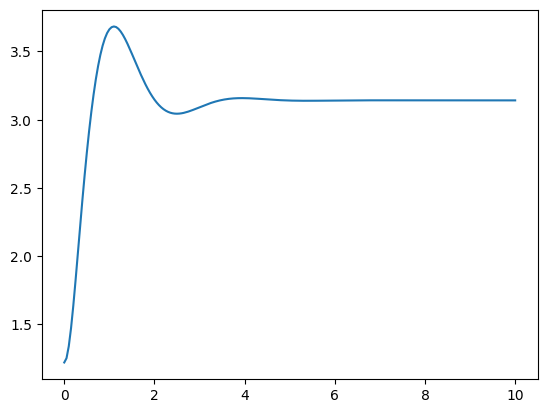

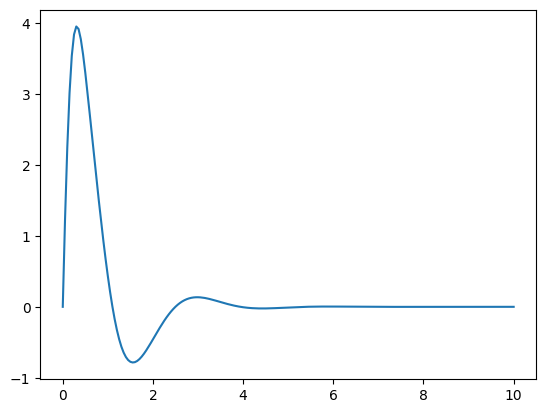

In [65]:
if __name__ == '__main__':
    main()